<a href="https://colab.research.google.com/github/sarinananya/MLmodels/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction Model**

**Step 1**: *Importing libraries and loading the dataset*

In [1]:
import pandas as pd
import numpy as np

heart_df= pd.read_csv('https://www.dropbox.com/s/ltksjtb54wrov5q/HeartDisease.csv?dl=1')

**Step 2**: *Exploratory data analysis*

In [ ]:
heart_df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


**Observation**
1. {age, sex, cp,	trestbps,	chol,	fbs,	restecg,	thalach,exang,oldpeak,	slope,	ca,	thal} are all **independent variables** and {target} is a **dependent variable**
2. About the dataset

  *   cp- chest pain
  *   Trestbps— resting blood pressure; normal range: 120/80
  *   Chol— serum cholesterol; normal < 170 mg/dL
  *   Fbs— fasting blood sugar
  *   Restecg— resting electrocardiographic results
  *   Thalach— maximum heart rate achieved; value:220 minus your age
  *   Exang— exercise-induced angina; agnia is a chest pain caused due to reduced blood flow to heart
  *   **T**arget: 0 means no disease, 1 means has a disease









In [ ]:
heart_df.info()

**observation**: we have 13 integer type values and one float value i.e. oldpeak

In [ ]:
heart_df.isnull().sum()

**observation**: the dataset contains no null values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


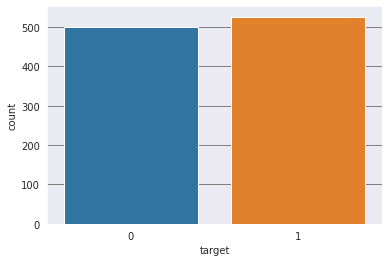

In [2]:
import seaborn as sns
sns.set_style("darkgrid",{'grid.color':'0.4'})
sns.countplot(heart_df['target'])

**observation**: the dataset is not imbalanced, which implies over/under sampling not required

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d9add8d50>,
      dtype=object)

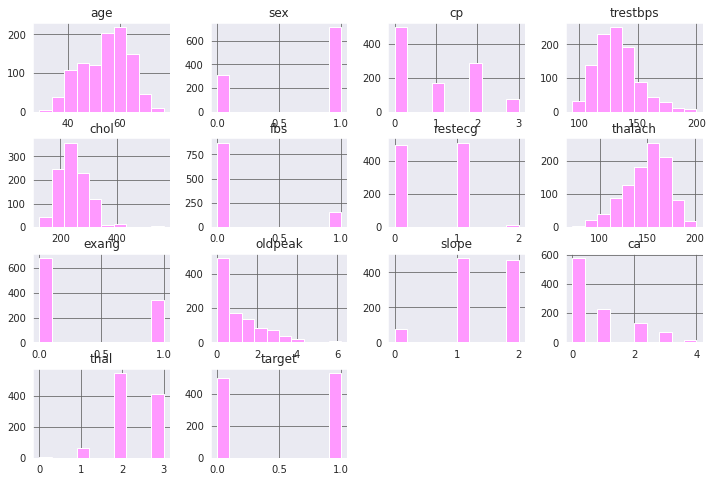

In [3]:
import matplotlib.pyplot as plt
heart_df.hist(figsize=(12,8), color='#FF99FF')

**Analysing each feature individually**

# 1. Age

In [ ]:
#analysing age groups
heart_df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

**observation**: *from the above output we saw that the minimum age is 29 and the maximum being 77, with the mean being 54, so lets group these ages in three different categories*

In [5]:
Young_adults = heart_df[(heart_df.age>=29)&(heart_df.age<40)&(heart_df.target==1)]
middle_aged = heart_df[(heart_df.age>=40)&(heart_df.age<55)&(heart_df.target==1)]
old_adults = heart_df[(heart_df.age>55)&(heart_df.target==1)]

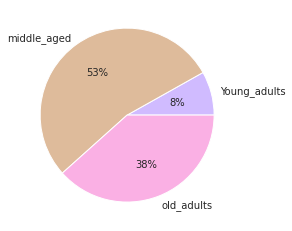

In [6]:

data=[len(Young_adults),len(middle_aged),len(old_adults)]
labels= ['Young_adults','middle_aged','old_adults']
colors = sns.color_palette('pastel')[4:8]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

**observation**:*according to this dataset maximum number of cardiovascular diseases are seen people in age range 40 to 55*

# 2. Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


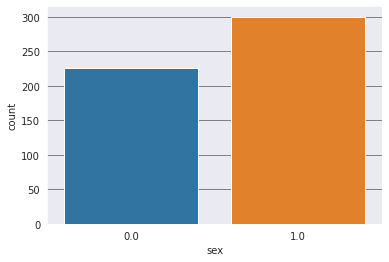

In [ ]:
sns.set_style("darkgrid",{'grid.color':'0.4'})
sns.countplot(heart_df.sex.where(heart_df.target==1))

**observation**: *the above graph shows that males are more prone to heart diseases that females*

# 3. Chest Pain

In [ ]:
heart_df['cp'].nunique()

4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


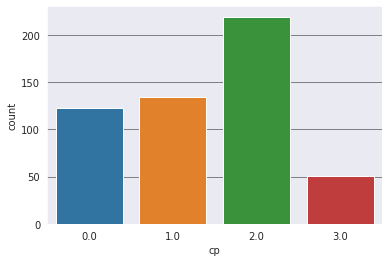

In [ ]:
sns.set_style("darkgrid",{'grid.color':'0.4'})
sns.countplot(heart_df.cp.where(heart_df.target==1))
#0,1,2 and 3 are the levels of chest pains

# **Feature Engineering**

In [8]:
x= heart_df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y= heart_df['target']

# standard scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x= sc.fit_transform(x)

# **Train Test Split**

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(scaled_x,y,test_size=0.33,random_state=2022)

**applying different machine learning algorithms to create the model**

# 1. KNN (k-nearest neighbours)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knnModel= KNeighborsClassifier(n_neighbors = 5)
knnModel.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred= knnModel.predict(x_test)

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(y_test,y_pred))
print("F1 Score:")
f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       167
           1       0.92      0.84      0.88       172

    accuracy                           0.88       339
   macro avg       0.89      0.89      0.88       339
weighted avg       0.89      0.88      0.88       339

F1 Score:


0.8814589665653495

*The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. F1-score: 2(P∗R)/P+R*
*

F1 score	Interpretation
> 0.9- 	**Very good**   0.8 -0.9	**Good**   0.5-0.8	**OK**   < 0.5- 	**Not good**

Our model has a F1 score of 0.88 which is good

# 2. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lrmodel= LogisticRegression()
lrmodel.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred= lrmodel.predict(x_test)
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(y_test,y_pred))
print("F1 Score:")
f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       167
           1       0.86      0.88      0.87       172

    accuracy                           0.87       339
   macro avg       0.87      0.87      0.87       339
weighted avg       0.87      0.87      0.87       339

F1 Score:


0.8735632183908046